# Precios de Casas:

A  partir  de  la  base  de  datos  de  precios  de  casas  de  Boston ( Boston  Housing  Data
),  realiza  la regresión de los precios de las casas con las siguientes variantes:

* Usando m ́ınimos cuadrados
* Aplicando regularización por norma $l_{1}$ y $l_2$
* Expandiendo los atributos con funciones base polinomiales
* Seleccionando los atributos más importantes

Grafica el error de generalización del modelo con diferentes grados del polinomio, coeficientes de
regularización  y  n ́umero  de  atributos.  Todos  los  modelos  deber ́an  ser  evaluados  con  validación
cruzada de 10 particiones

In [77]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

--2017-03-20 19:25:02--  http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [text/plain]
Saving to: ‘housing.data.2’

housing.data.2      100%[===================>]  47.93K  --.-KB/s    in 0.1s    

2017-03-20 19:25:02 (383 KB/s) - ‘housing.data.2’ saved [49082/49082]



In [78]:
import numpy

indices = numpy.random.permutation(data.shape[0])
training_idx, test_idx = indices[:int(data.shape[0]*0.8)], indices[int(data.shape[0]*0.8):]
X_train, X_test = data[training_idx,:], data[test_idx,:]

print (X_train.shape)
print (X_test.shape)

(404, 14)
(102, 14)


In [79]:
# crea matriz de diseño (agrega 1 a las entradas para la ordenada al origen)
X_train_ones_p = np.insert(X_train,0,1.0,axis=1)
print (X_train_ones_p[0])





[  1.00000000e+00   1.35870000e-01   0.00000000e+00   1.05900000e+01
   1.00000000e+00   4.89000000e-01   6.06400000e+00   5.91000000e+01
   4.23920000e+00   4.00000000e+00   2.77000000e+02   1.86000000e+01
   3.81320000e+02   1.46600000e+01   2.44000000e+01]


In [80]:
X_train_ones=X_train_ones_p[:,0:14]
#print (X_train_ones[0])
y_train=X_train_ones_p[:,14:15]
#print (y_train[0])


In [81]:
# Para encontrar pesos por mínimos cuadrados, theta_ml = (XT X)-1 XT y
# (XT X)
XTX = np.dot(X_train_ones.T, X_train_ones)
# (XT X)-1
XTX_inv = np.linalg.inv(XTX)
# XT y
XTy = np.dot(X_train_ones.T, y_train)
#theta_ml = (XT X)-1 XT y
theta_ml = np.dot(XTX_inv, XTy)
print theta_ml


[[  3.94072091e+01]
 [ -7.86219831e-02]
 [  4.39310885e-02]
 [  1.52249455e-02]
 [  2.48729600e+00]
 [ -1.93747420e+01]
 [  3.47129823e+00]
 [  9.42990684e-03]
 [ -1.43865764e+00]
 [  2.68441302e-01]
 [ -8.34033851e-03]
 [ -1.03912028e+00]
 [  1.00261114e-02]
 [ -5.67290412e-01]]


In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train_ones, y_train)
print('Coefficients: \n', regr.coef_)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train_ones, y_train))


('Coefficients: \n', array([[  3.94072091e+01,  -7.86219831e-02,   4.39310885e-02,
          1.52249455e-02,   2.48729600e+00,  -1.93747420e+01,
          3.47129823e+00,   9.42990684e-03,  -1.43865764e+00,
          2.68441302e-01,  -8.34033851e-03,  -1.03912028e+00,
          1.00261114e-02,  -5.67290412e-01]]))
Variance score: 0.73


('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


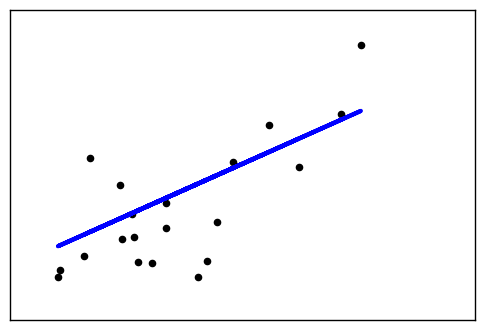

In [69]:
47


print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Total running time of the script: (0 minutes 0.095 seconds)
Download Python source code: plot_ols.py
Download IPython notebook: plot_ols.ipynb
© 2010 - 2016, scikit-learn developers (BSD License). Show this page source
Previous
Next
